In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pathlib import Path
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from typing import Tuple, cast

In [28]:
df = pd.read_csv("pet_adoption_data.csv")
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [29]:
# EDA : Stats and Plots
# Let's plot the adoption likelihood according to pet size, pet color, pet weight using matplotlib library

In [30]:
import seaborn

Text(0.5, 1.0, 'The Chance of a Pet being Adopted depending on its Size')

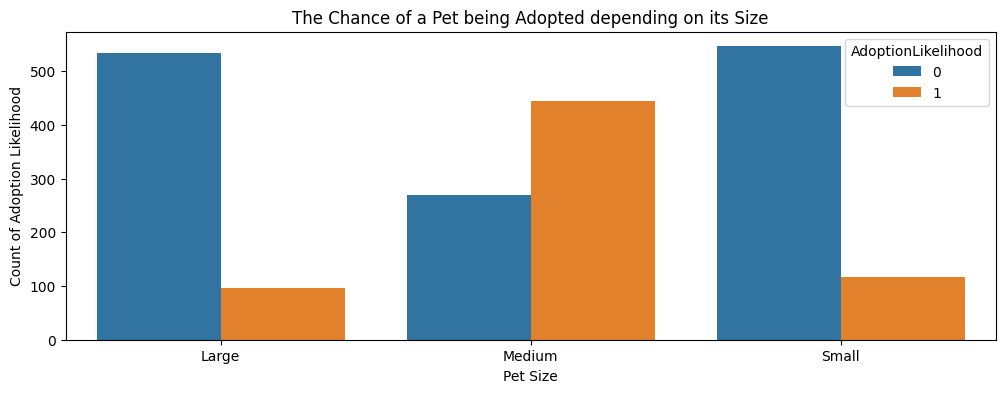

In [31]:
fig, ax =plt.subplots(figsize = [12, 4])
seaborn.countplot(x = df['Size'], hue = df['AdoptionLikelihood'])

ax.set_xlabel('Pet Size')
ax.set_ylabel('Count of Adoption Likelihood')
plt.title ('The Chance of a Pet being Adopted depending on its Size')


Text(0.5, 1.0, 'The Chance of a Pet being Adopted depending on its Color')

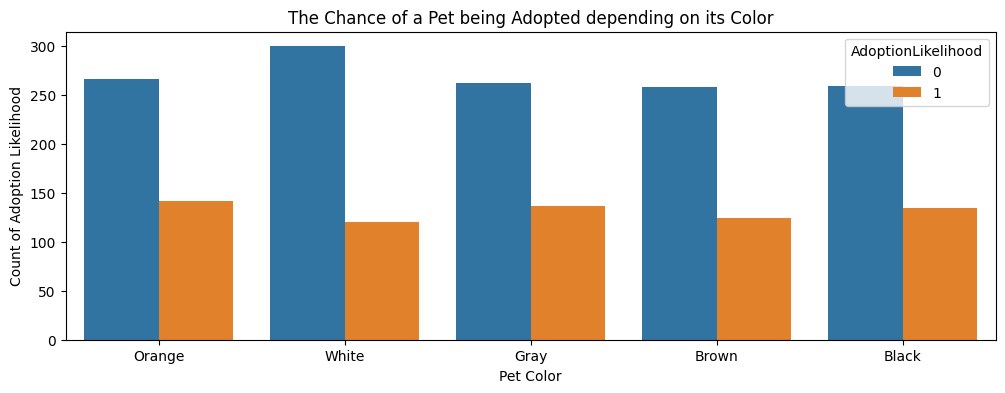

In [41]:
fig, ax =plt.subplots(figsize = [12, 4])
seaborn.countplot(x = df['Color'], hue = df['AdoptionLikelihood'])

ax.set_xlabel('Pet Color')
ax.set_ylabel('Count of Adoption Likelihood')
plt.title ('The Chance of a Pet being Adopted depending on its Color')

In [33]:
df_adoption = df[df['AdoptionLikelihood'] ==1]

In [34]:
df_adoption

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
7,507,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1
11,511,Rabbit,Rabbit,5,White,Small,29.078056,1,0,60,462,0,1
14,514,Cat,Persian,160,Brown,Medium,6.303899,1,0,11,404,0,1
17,517,Cat,Persian,50,White,Medium,28.982929,1,0,13,109,0,1
22,522,Dog,Labrador,3,Gray,Large,15.576273,1,0,50,369,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2493,Bird,Parakeet,115,Orange,Small,24.967156,1,0,37,358,1,1
1995,2495,Rabbit,Rabbit,72,Black,Medium,26.517957,0,0,69,429,1,1
1999,2499,Cat,Persian,16,Gray,Medium,18.007326,0,0,13,404,0,1
2001,2501,Bird,Parakeet,179,Brown,Small,29.475254,1,0,69,197,0,1


Text(0.5, 1.0, 'The Number of pets adopted depending on its size')

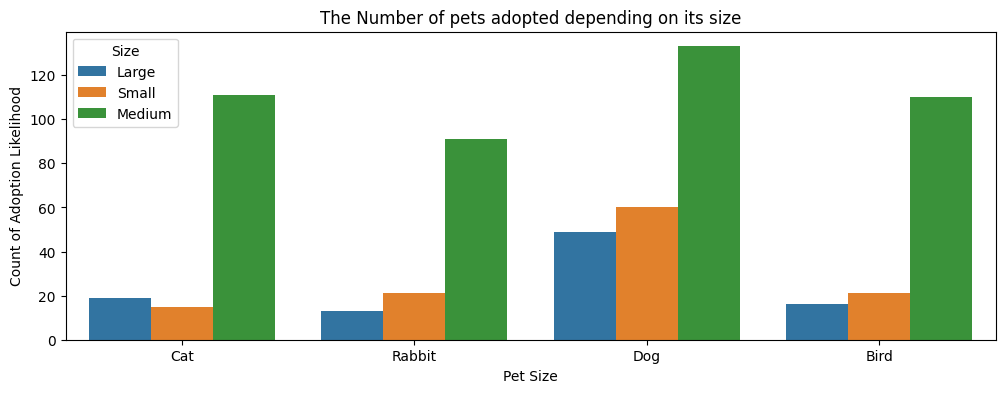

In [47]:
fig, ax =plt.subplots(figsize = [12, 4])
seaborn.countplot(x = df_adoption['PetType'], hue = df_adoption['Size'])

ax.set_xlabel('Pet Size')
ax.set_ylabel('Count of Adoption Likelihood')
plt.title ('The Number of pets adopted depending on its size')

Text(0.5, 1.0, 'The Number of pets adopted depending on its color')

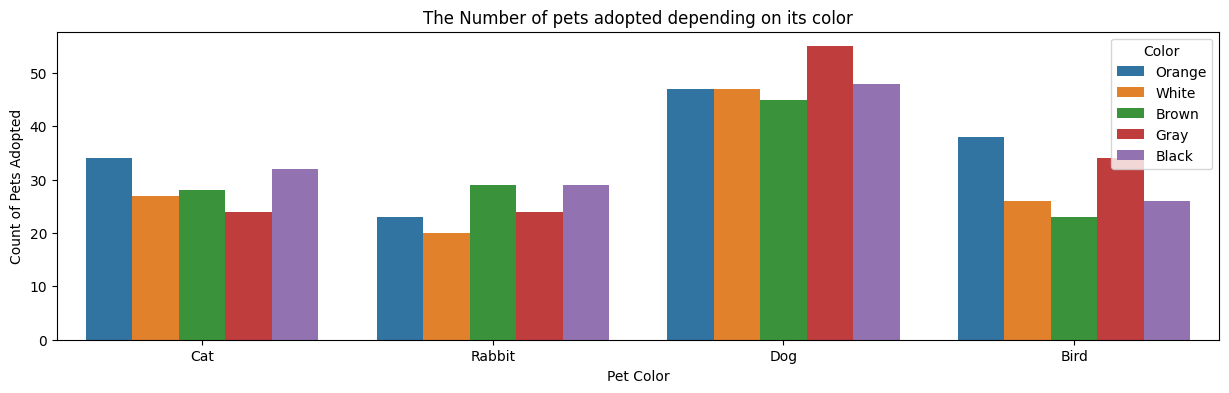

In [48]:
fig, ax =plt.subplots(figsize = [15, 4])
seaborn.countplot(x = df_adoption['PetType'], hue = df_adoption['Color'])

ax.set_xlabel('Pet Color')
ax.set_ylabel('Count of Pets Adopted')
plt.title ('The Number of pets adopted depending on its color')

In [ ]:
df_plot = df[['WeightKg', 'AdoptionLikelihood']].copy()

# Create 1-kg bins from 0 to 30
bins = np.arange(0, 31, 1)  
df_plot['WeightBin'] = pd.cut(df_plot['WeightKg'], bins=bins, right=False)

# Count number of pets per bin and adoption likelihood
weight_counts = df_plot.groupby(['WeightBin', 'AdoptionLikelihood']).size().reset_index(name='Count')
weight_counts['WeightStart'] = weight_counts['WeightBin'].apply(lambda x: x.left)



C:\Users\julia\AppData\Local\Temp\ipykernel_1076\2144215626.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_counts = df_plot.groupby(['WeightBin', 'AdoptionLikelihood']).size().reset_index(name='Count')


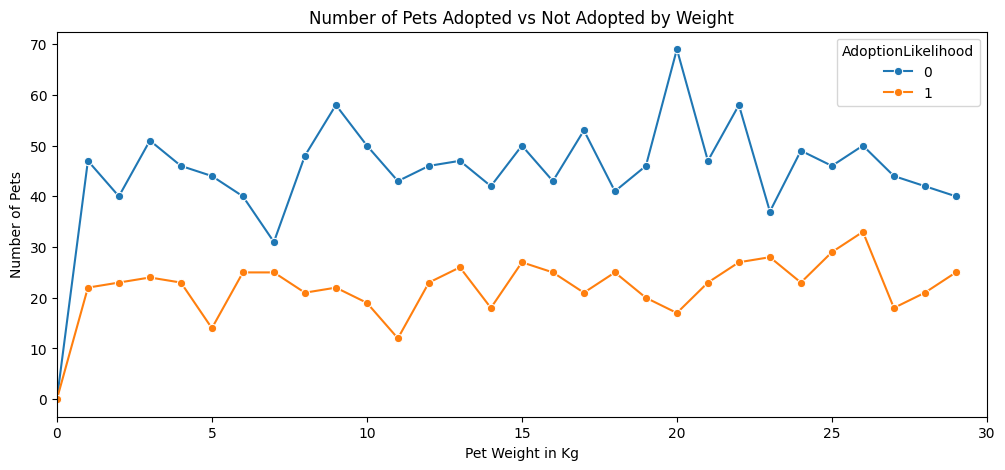

In [ ]:
fig, ax = plt.subplots(figsize=[12,5])
seaborn.lineplot(data=weight_counts, x='WeightStart', y='Count', hue='AdoptionLikelihood', marker='o', ax=ax )

ax.set_xlabel('Pet Weight in Kg')
ax.set_ylabel('Number of Pets')
plt.title('Number of Pets Adopted vs Not Adopted by Weight')
plt.xlim(0, 30)
plt.show()
